In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
!git clone https://github.com/sunsmarterjie/yolov12
 

Cloning into 'yolov12'...
remote: Enumerating objects: 962, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 962 (delta 217), reused 199 (delta 189), pack-reused 722 (from 1)
Receiving objects: 100% (962/962), 1.59 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [11]:
cd /kaggle/working/yolov12

/kaggle/working/yolov12


In [12]:
!pip install -r requirements.txt
!pip install -e .

ERROR: flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl is not a supported wheel on this platform.
Obtaining file:///kaggle/working/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.63-0.editable-py3-none-any.whl size=19532 sha256=636a7912c574292b64670e221ab1faca4b3422cce62e07b1bb7fbdb2074bfdd9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ldz6ljy4/wheels/60/62/9a/2f76ee95a2c4942568e8896b2e053f14b7519ce40b79b208ea
Successfully built ultralytics


In [13]:
import yaml
# credit / source https://www.kaggle.com/awsaf49/vinbigdata-cxr-ad-yolov5-14-class-train
classes = [ '0: fruit_on_tree', '1: fruit_on_ground']
#classes = [ 'scratches', 'patches', 'crazing', 'pitted_surface', 'rolled-in_scale', 'inclusion']
 

data = dict(
    train =  '/kaggle/input/signature/train/images',
    val   =  '/kaggle/input/signature/valid/images',
    #test   =  '/kaggle/working/datasets/test/images',
    nc    = 2,
    names = classes
    )

with open('/kaggle/working/data.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

In [14]:
from ultralytics import YOLO
!pip install -U ray==2.40.0

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 22.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.42.1
    Uninstalling ray-2.42.1:
      Successfully uninstalled ray-2.42.1


In [17]:
model = YOLO('yolov12n.yaml')

# Train the model
results = model.train(
  data='/kaggle/working/data.yaml',
  epochs=50, 
  batch=32, 
  imgsz=640,
  scale=0.5,  # S:0.9; M:0.9; L:0.9; X:0.9
  mosaic=1.0,
  mixup=0.0,  # S:0.05; M:0.15; L:0.15; X:0.2
  copy_paste=0.1,  # S:0.15; M:0.4; L:0.5; X:0.6

)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning /kaggle/input/signature/train/labels... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<00:00, 481.48it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/signature/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/signature/valid/labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 477.00it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/signature/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolov12/runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /kaggle/working/yolov12/runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.129       4.71      4.388         34        640: 100%|██████████| 5/5 [01:54<00:00, 22.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

                   all         35         35    0.00199      0.171    0.00157   0.000232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      3.028      4.732      4.321         41        640: 100%|██████████| 5/5 [01:50<00:00, 22.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

                   all         35         35   0.000883     0.0857   0.000545   0.000122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      3.115      4.644      4.251         30        640: 100%|██████████| 5/5 [01:50<00:00, 22.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]

                   all         35         35    0.00228        0.2    0.00163   0.000362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      3.049       4.64      4.165         20        640: 100%|██████████| 5/5 [01:52<00:00, 22.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         35         35      0.001        0.2   0.000689   0.000405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.953      4.439      4.082         32        640: 100%|██████████| 5/5 [01:48<00:00, 21.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]

                   all         35         35   0.000963        0.2   0.000918   0.000464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       2.99      4.295      4.015         32        640: 100%|██████████| 5/5 [01:50<00:00, 22.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         35         35   0.000985        0.2    0.00169   0.000521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.889      4.217       3.91         33        640: 100%|██████████| 5/5 [01:56<00:00, 23.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

                   all         35         35      0.001        0.2    0.00176   0.000567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.897      4.007      3.762         28        640: 100%|██████████| 5/5 [01:55<00:00, 23.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.29s/it]

                   all         35         35      0.001        0.2   0.000855    0.00047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.769      3.954      3.618         30        640: 100%|██████████| 5/5 [01:55<00:00, 23.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         35         35   0.000983        0.2    0.00146   0.000529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      2.706      3.781      3.466         37        640: 100%|██████████| 5/5 [01:56<00:00, 23.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]

                   all         35         35   0.000969        0.2    0.00225   0.000634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      2.691      3.777      3.442         23        640: 100%|██████████| 5/5 [01:54<00:00, 22.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         35         35    0.00096        0.2    0.00291   0.000746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      2.673      3.652      3.383         35        640: 100%|██████████| 5/5 [01:51<00:00, 22.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         35         35    0.00183        0.2    0.00412   0.000905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      2.568      3.431       3.23         37        640: 100%|██████████| 5/5 [01:53<00:00, 22.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all         35         35     0.0019        0.2    0.00383   0.000702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      2.606      3.556      3.302         35        640: 100%|██████████| 5/5 [01:55<00:00, 23.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]

                   all         35         35   0.000943        0.2    0.00374     0.0011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      2.481      3.463      3.102         30        640: 100%|██████████| 5/5 [01:55<00:00, 23.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

                   all         35         35   0.000934        0.2     0.0509    0.00864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      2.469      3.234      3.029         36        640: 100%|██████████| 5/5 [01:56<00:00, 23.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

                   all         35         35    0.00091        0.2     0.0224    0.00448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      2.529      3.245      3.069         31        640: 100%|██████████| 5/5 [01:50<00:00, 22.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         35         35   0.000916        0.2     0.0217    0.00381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      2.554      3.196      3.111         31        640: 100%|██████████| 5/5 [01:50<00:00, 22.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]

                   all         35         35    0.00105        0.2     0.0141    0.00295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      2.383      3.036      2.907         42        640: 100%|██████████| 5/5 [01:53<00:00, 22.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

                   all         35         35    0.00115        0.2    0.00119   0.000737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      2.515      2.999      2.942         32        640: 100%|██████████| 5/5 [01:50<00:00, 22.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         35         35     0.0015        0.2    0.00167   0.000829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      2.287       3.01      2.793         23        640: 100%|██████████| 5/5 [02:01<00:00, 24.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

                   all         35         35    0.00118        0.2    0.00134   0.000767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      2.387      2.895      2.815         32        640: 100%|██████████| 5/5 [01:54<00:00, 22.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         35         35    0.00118        0.2     0.0018      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G        2.3      2.712      2.716         38        640: 100%|██████████| 5/5 [01:53<00:00, 22.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         35         35    0.00198        0.2    0.00704     0.0027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      2.151      2.575      2.615         32        640: 100%|██████████| 5/5 [01:55<00:00, 23.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]

                   all         35         35    0.00214        0.2     0.0326    0.00931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      2.354      2.593       2.75         27        640: 100%|██████████| 5/5 [01:56<00:00, 23.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         35         35      0.455      0.143      0.137     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      2.064      2.391      2.559         33        640: 100%|██████████| 5/5 [01:52<00:00, 22.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         35         35      0.194      0.143      0.123     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      2.259      2.354       2.64         34        640: 100%|██████████| 5/5 [01:52<00:00, 22.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         35         35      0.201      0.343      0.151     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      2.154      2.318      2.574         30        640: 100%|██████████| 5/5 [01:56<00:00, 23.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]

                   all         35         35       0.19      0.629      0.156     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G       2.13      2.286      2.549         36        640: 100%|██████████| 5/5 [01:57<00:00, 23.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]

                   all         35         35    0.00377      0.914      0.128     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      2.129      2.197      2.508         41        640: 100%|██████████| 5/5 [01:52<00:00, 22.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         35         35       0.62      0.514      0.528       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      2.092      2.122      2.495         32        640: 100%|██████████| 5/5 [01:53<00:00, 22.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

                   all         35         35      0.623      0.571      0.597      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.995      1.964      2.389         31        640: 100%|██████████| 5/5 [01:58<00:00, 23.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]

                   all         35         35      0.537      0.571      0.456      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.877      1.952      2.361         26        640: 100%|██████████| 5/5 [01:50<00:00, 22.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         35         35       0.23      0.371      0.315      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      2.039      1.973      2.397         37        640: 100%|██████████| 5/5 [01:50<00:00, 22.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

                   all         35         35      0.927      0.686      0.745      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.94      1.918       2.33         31        640: 100%|██████████| 5/5 [01:52<00:00, 22.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

                   all         35         35      0.866      0.743      0.772      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.789      1.745      2.231         31        640: 100%|██████████| 5/5 [01:50<00:00, 22.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]

                   all         35         35      0.577      0.714      0.531      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.881      1.811      2.297         36        640: 100%|██████████| 5/5 [01:51<00:00, 22.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         35         35       0.93      0.765      0.819      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.721      1.722      2.201         33        640: 100%|██████████| 5/5 [01:56<00:00, 23.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         35         35      0.965      0.798      0.859      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.692      1.673      2.193         27        640: 100%|██████████| 5/5 [01:51<00:00, 22.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         35         35          1      0.818      0.885        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.643      1.528      2.081         38        640: 100%|██████████| 5/5 [01:55<00:00, 23.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         35         35      0.967      0.849      0.907      0.644


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G       1.26      1.839      1.848         15        640: 100%|██████████| 5/5 [01:53<00:00, 22.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         35         35      0.994        0.8      0.896      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.172       1.61      1.778         15        640: 100%|██████████| 5/5 [01:52<00:00, 22.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         35         35          1       0.85      0.915      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.219      1.586      1.761         15        640: 100%|██████████| 5/5 [01:51<00:00, 22.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         35         35          1       0.82      0.926      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.122      1.474      1.697         15        640: 100%|██████████| 5/5 [01:51<00:00, 22.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         35         35      0.974      0.857      0.935      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.109      1.536      1.759         15        640: 100%|██████████| 5/5 [01:45<00:00, 21.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

                   all         35         35      0.971      0.857      0.934      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.073      1.438       1.65         15        640: 100%|██████████| 5/5 [01:48<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         35         35      0.957        0.8      0.929       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      0.991      1.346      1.609         15        640: 100%|██████████| 5/5 [01:49<00:00, 22.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         35         35      0.997      0.857      0.928       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G       1.03       1.32      1.618         15        640: 100%|██████████| 5/5 [01:53<00:00, 22.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         35         35      0.988      0.857      0.926      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9276      1.272      1.537         15        640: 100%|██████████| 5/5 [01:51<00:00, 22.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         35         35      0.967       0.83      0.926      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9465      1.301      1.542         15        640: 100%|██████████| 5/5 [01:47<00:00, 21.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         35         35      0.967      0.847      0.925       0.77



50 epochs completed in 1.643 hours.
Optimizer stripped from /kaggle/working/yolov12/runs/detect/train3/weights/last.pt, 5.4MB
Optimizer stripped from /kaggle/working/yolov12/runs/detect/train3/weights/best.pt, 5.4MB

Validating /kaggle/working/yolov12/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]


                   all         35         35      0.967      0.829      0.926      0.778
      0: fruit_on_tree         35         35      0.967      0.829      0.926      0.778


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.8ms preprocess, 89.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /kaggle/working/yolov12/runs/detect/train3


Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


val: Scanning /kaggle/input/signature/valid/labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 536.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/signature/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]


                   all         35         35      0.967      0.829      0.926      0.778
      0: fruit_on_tree         35         35      0.967      0.829      0.926      0.778


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.8ms preprocess, 96.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /kaggle/working/yolov12/runs/detect/train32

image 1/1 /kaggle/input/signature/valid/images/Frame_108.jpg: 384x640 (no detections), 211.0ms
Speed: 4.2ms preprocess, 211.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


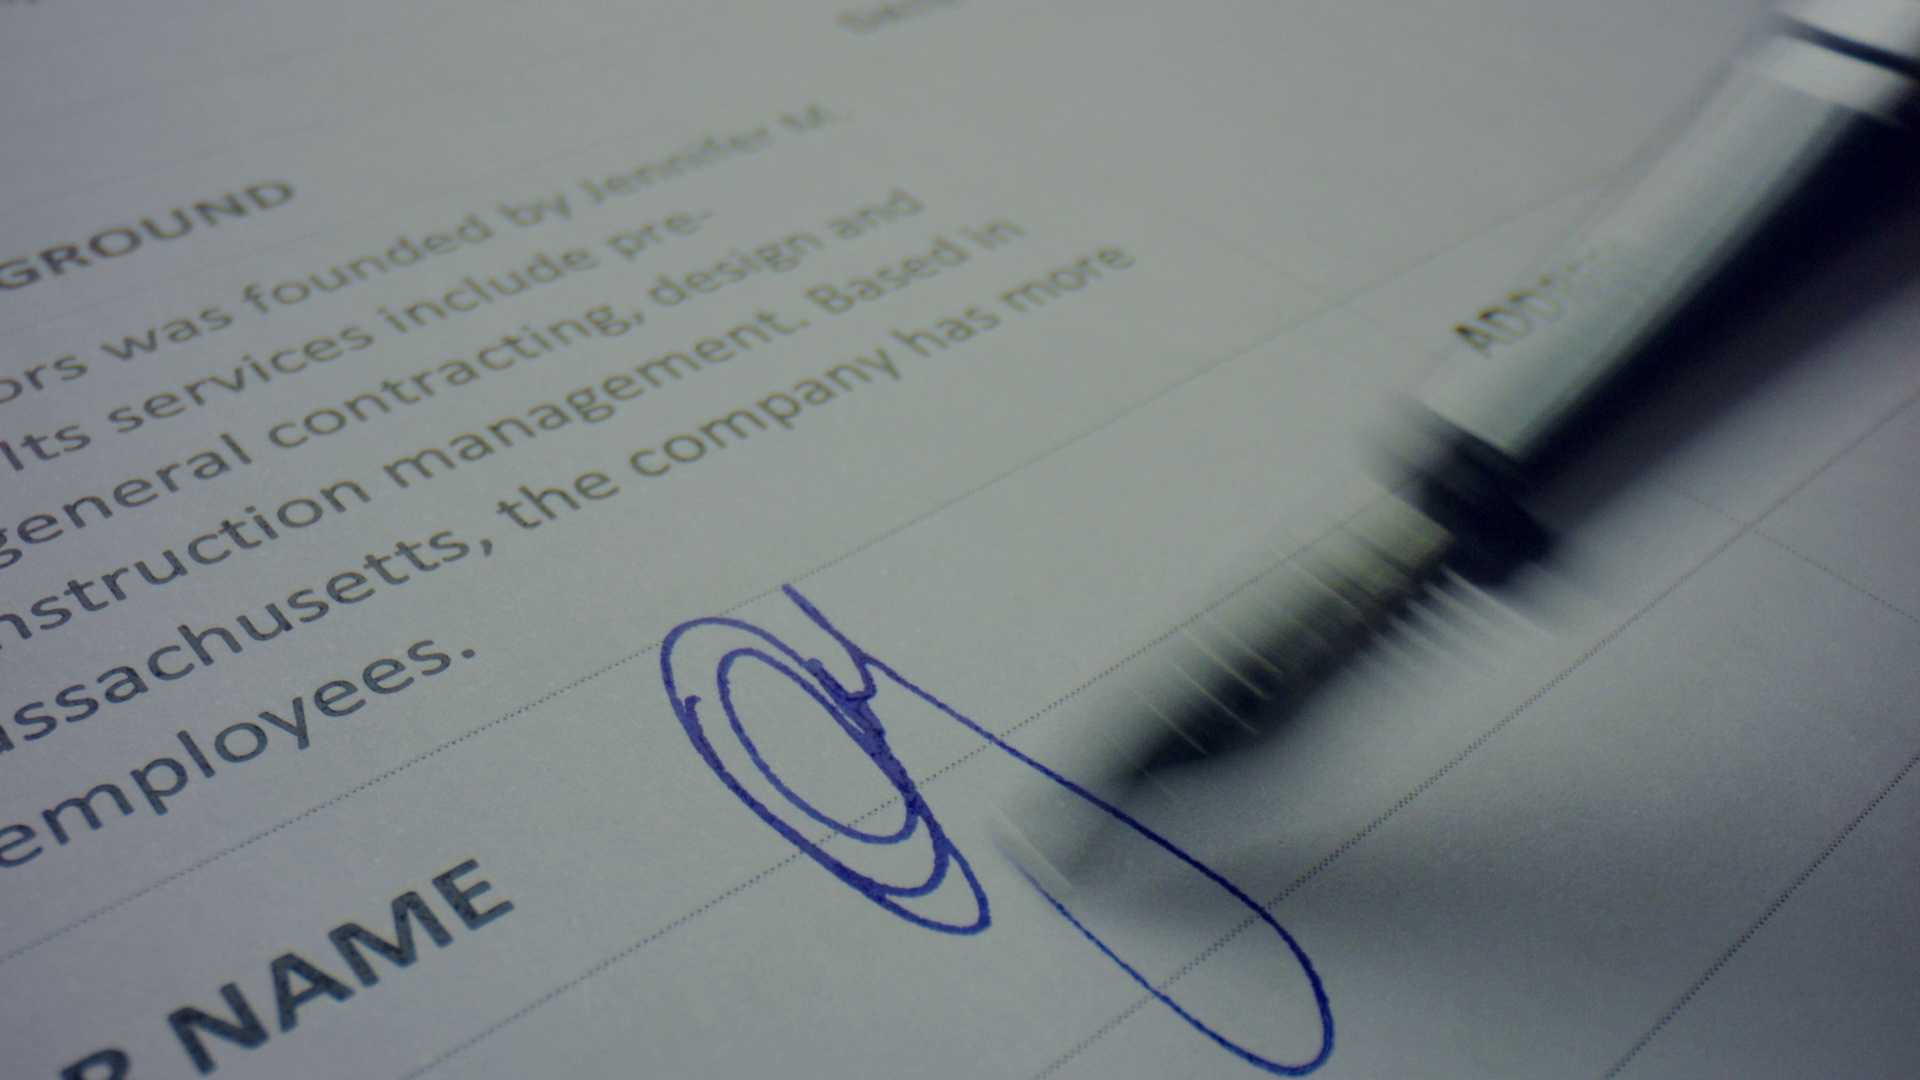

In [18]:
metrics = model.val(data='/kaggle/working/data.yaml')

# Perform object detection on an image
results = model("/kaggle/input/signature/valid/images/Frame_108.jpg")
results[0].show()

100%|██████████| 86.4k/86.4k [00:00<00:00, 497kB/s]


image 1/1 /kaggle/working/yolov12/dbe918ee225e4cceadd4c8dba12efa33.jpeg: 640x480 1 0: fruit_on_tree, 228.5ms
Speed: 4.5ms preprocess, 228.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


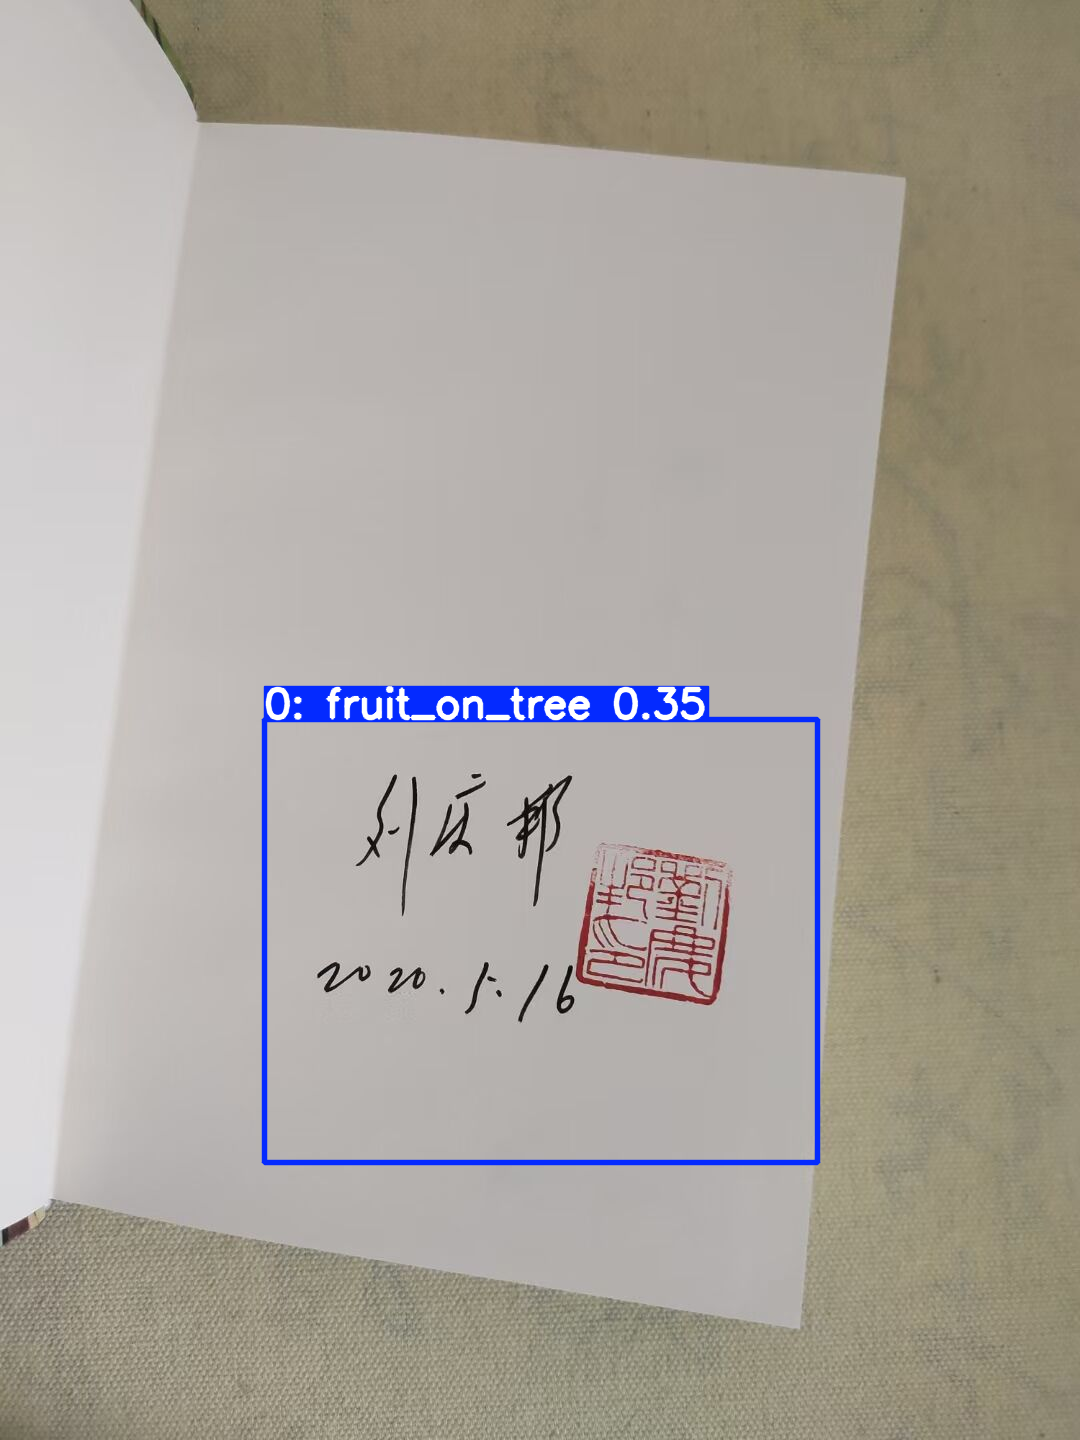

In [19]:
# Perform object detection on an image
results = model("https://p0.itc.cn/images01/20210206/dbe918ee225e4cceadd4c8dba12efa33.jpeg")
results[0].show()